In [ ]:
import pandas as pd

# Load the two data files into DataFrames
precipitation_df = pd.read_csv('../../data/florida_oranges_data/average_precipitation_by_date.csv')
close_price_df = pd.read_csv('../../data/florida_oranges_data/orange_juice_close_prices.csv')

# Convert the 'DATE' columns to datetime format for proper merging
precipitation_df['DATE'] = pd.to_datetime(precipitation_df['DATE'])
close_price_df['DATE'] = pd.to_datetime(close_price_df['DATE'])

# Merge the data on the 'DATE' column
merged_df = pd.merge(precipitation_df, close_price_df, on='DATE', how='inner')

# Clean the data:
# Remove rows where PRECIPITATION is negative or missing, or where CLOSE PRICE is missing
cleaned_df = merged_df[(merged_df['PRECIPITATION'] >= 0) & merged_df['PRECIPITATION'].notna() & merged_df['CLOSE PRICE'].notna()]

# Save the cleaned data to a new CSV file
cleaned_df.to_csv('../../data/florida_oranges_data/cleaned_data.csv', index=False)

print("Data cleaning and merging completed. The cleaned data is saved as 'cleaned_data.csv'.")

Data cleaning and merging completed. The cleaned data is saved as 'cleaned_data.csv'.


In [7]:
cleaned_df

,DATE,PRECIPITATION,CLOSE PRICE
0,2002-01-02,0.294500,92.949997
1,2002-01-03,0.201000,91.349998
2,2002-01-04,0.000000,94.250000
3,2002-01-07,0.034000,93.500000
4,2002-01-08,0.001000,93.500000
...,...,...,...
5730,2024-10-29,0.017501,511.500000
5731,2024-10-30,0.047002,505.350006
5735,2024-11-05,0.139500,511.750000
5740,2024-11-12,0.021500,478.750000


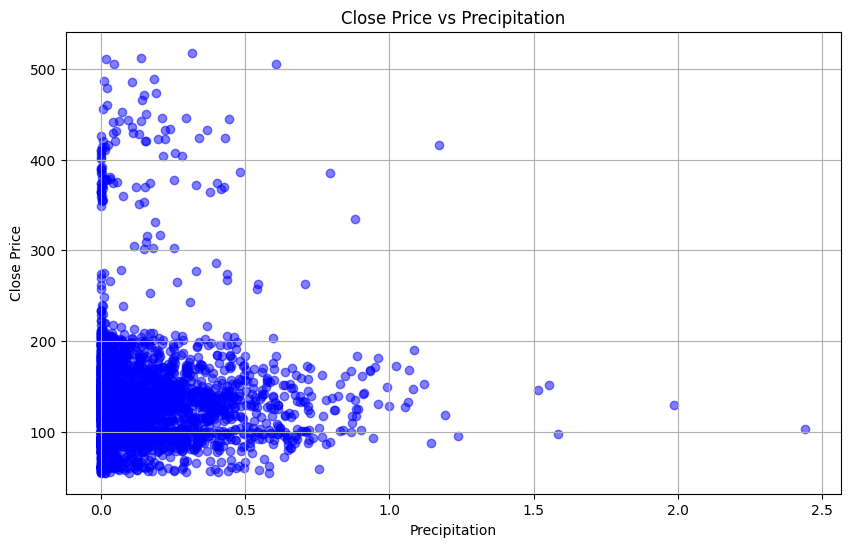

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned data from the CSV file
cleaned_df = pd.read_csv('../../data/florida_oranges_data/cleaned_data.csv')

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_df['PRECIPITATION'], cleaned_df['CLOSE PRICE'], color='blue', alpha=0.5)

# Label the axes and the plot
plt.title('Close Price vs Precipitation')
plt.xlabel('Precipitation')
plt.ylabel('Close Price')

# Show the plot
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd

# Load the cleaned data from the CSV file
cleaned_df = pd.read_csv('../../data/florida_oranges_data/cleaned_data.csv')

# Calculate the correlation between PRECIPITATION and CLOSE PRICE
correlation = cleaned_df['PRECIPITATION'].corr(cleaned_df['CLOSE PRICE'])

# Display the correlation value
print(f"The correlation between precipitation and close price is: {correlation}")

The correlation between precipitation and close price is: -0.015551665194598977


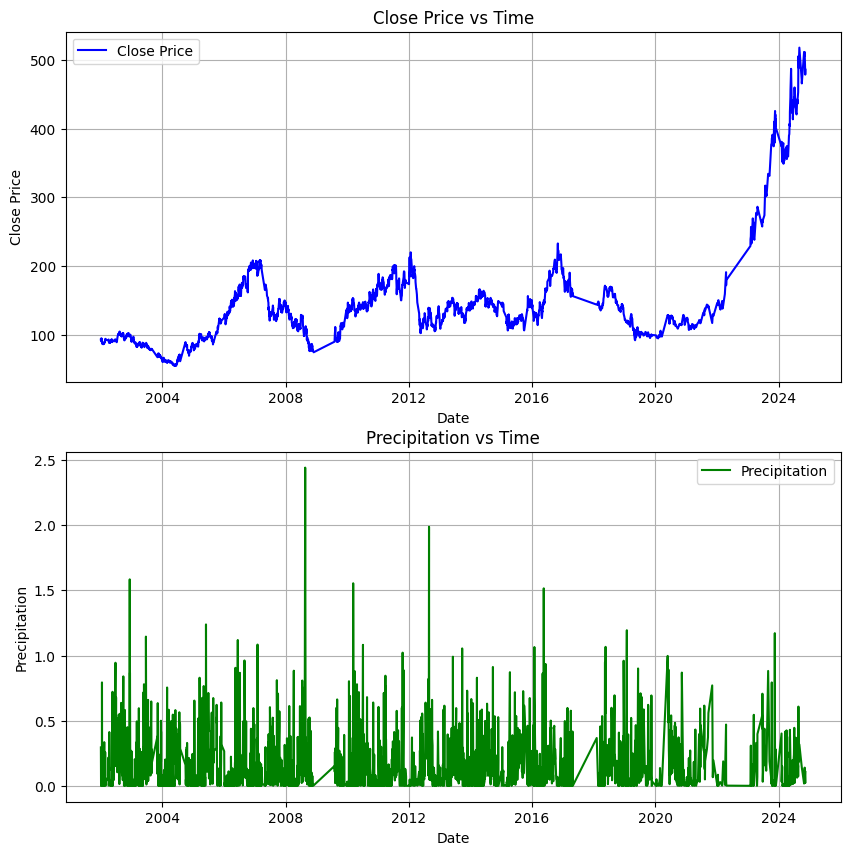

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned data from the CSV file
cleaned_df = pd.read_csv('../../data/florida_oranges_data/cleaned_data.csv')

# Convert the 'DATE' column to datetime format
cleaned_df['DATE'] = pd.to_datetime(cleaned_df['DATE'])

# Create a figure and two subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# Plot CLOSE PRICE vs. DATE
ax[0].plot(cleaned_df['DATE'], cleaned_df['CLOSE PRICE'], color='blue', label='Close Price')
ax[0].set_title('Close Price vs Time')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Close Price')
ax[0].grid(True)
ax[0].legend()

# Plot PRECIPITATION vs. DATE
ax[1].plot(cleaned_df['DATE'], cleaned_df['PRECIPITATION'], color='green', label='Precipitation')
ax[1].set_title('Precipitation vs Time')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Precipitation')
ax[1].grid(True)
ax[1].legend()

# Adjust layout for bett

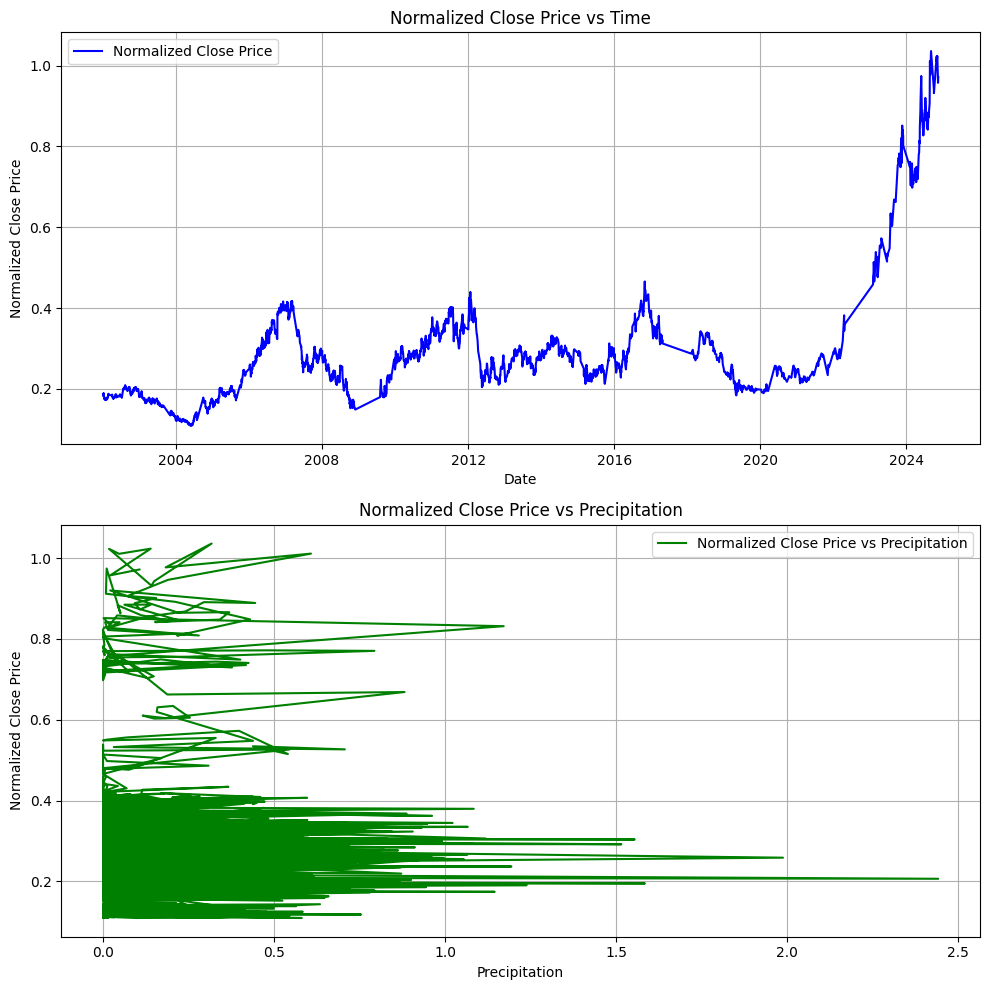

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned data from the CSV file
cleaned_df = pd.read_csv('../../data/florida_oranges_data/cleaned_data.csv')

# Convert the 'DATE' column to datetime format
cleaned_df['DATE'] = pd.to_datetime(cleaned_df['DATE'])

# Normalize CLOSE PRICE by dividing it by 500
cleaned_df['CLOSE PRICE NORMALIZED'] = cleaned_df['CLOSE PRICE'] / 500

# Create a figure and two subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# Plot normalized CLOSE PRICE vs. DATE
ax[0].plot(cleaned_df['DATE'], cleaned_df['CLOSE PRICE NORMALIZED'], color='blue', label='Normalized Close Price', linestyle='-', marker='')
ax[0].set_title('Normalized Close Price vs Time')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Normalized Close Price')
ax[0].grid(True)
ax[0].legend()

# Plot normalized CLOSE PRICE vs. PRECIPITATION
ax[1].plot(cleaned_df['PRECIPITATION'], cleaned_df['CLOSE PRICE NORMALIZED'], color='green', label='Normalized Close Price vs Precipitation', linestyle='-', marker='')
ax[1].set_title('Normalized Close Price vs Precipitation')
ax[1].set_xlabel('Precipitation')
ax[1].set_ylabel('Normalized Close Price')
ax[1].grid(True)
ax[1].legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
import pandas as pd

# Load the cleaned data from the CSV file
cleaned_df = pd.read_csv('../../data/florida_oranges_data/cleaned_data.csv')

# Normalize CLOSE PRICE by dividing it by 500
cleaned_df['CLOSE PRICE NORMALIZED'] = cleaned_df['CLOSE PRICE'] / 500

# Calculate the correlation between the normalized close price and precipitation
correlation_normalized = cleaned_df['CLOSE PRICE NORMALIZED'].corr(cleaned_df['PRECIPITATION'])

# Display the correlation value
print(f"The correlation between normalized close price and precipitation is: {correlation_normalized}")

The correlation between normalized close price and precipitation is: -0.015551665194598975


In [14]:
# Min-Max Normalization for Close Price and Precipitation
cleaned_df['CLOSE PRICE MIN-MAX NORMALIZED'] = (cleaned_df['CLOSE PRICE'] - cleaned_df['CLOSE PRICE'].min()) / (cleaned_df['CLOSE PRICE'].max() - cleaned_df['CLOSE PRICE'].min())
cleaned_df['PRECIPITATION MIN-MAX NORMALIZED'] = (cleaned_df['PRECIPITATION'] - cleaned_df['PRECIPITATION'].min()) / (cleaned_df['PRECIPITATION'].max() - cleaned_df['PRECIPITATION'].min())

# Calculate the correlation between the normalized close price and precipitation
correlation_min_max = cleaned_df['CLOSE PRICE MIN-MAX NORMALIZED'].corr(cleaned_df['PRECIPITATION MIN-MAX NORMALIZED'])
print(f"Correlation with Min-Max Normalized data: {correlation_min_max}")


Correlation with Min-Max Normalized data: -0.01555166519459899


In [15]:
# Z-Score Normalization for Close Price and Precipitation
cleaned_df['CLOSE PRICE Z-NORMALIZED'] = (cleaned_df['CLOSE PRICE'] - cleaned_df['CLOSE PRICE'].mean()) / cleaned_df['CLOSE PRICE'].std()
cleaned_df['PRECIPITATION Z-NORMALIZED'] = (cleaned_df['PRECIPITATION'] - cleaned_df['PRECIPITATION'].mean()) / cleaned_df['PRECIPITATION'].std()

# Calculate the correlation between the normalized close price and precipitation
correlation_z_score = cleaned_df['CLOSE PRICE Z-NORMALIZED'].corr(cleaned_df['PRECIPITATION Z-NORMALIZED'])
print(f"Correlation with Z-Score Normalized data: {correlation_z_score}")


Correlation with Z-Score Normalized data: -0.015551665194598996


In [16]:
# Log Transformation for Close Price and Precipitation
cleaned_df['CLOSE PRICE LOG TRANSFORMED'] = cleaned_df['CLOSE PRICE'].apply(lambda x: np.log(x + 1))
cleaned_df['PRECIPITATION LOG TRANSFORMED'] = cleaned_df['PRECIPITATION'].apply(lambda x: np.log(x + 1))

# Calculate the correlation between the transformed close price and precipitation
correlation_log_transformed = cleaned_df['CLOSE PRICE LOG TRANSFORMED'].corr(cleaned_df['PRECIPITATION LOG TRANSFORMED'])
print(f"Correlation with Log Transformed data: {correlation_log_transformed}")


NameError: name 'np' is not defined